In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sct

In [2]:
#arr = np.random.normal(2, 3, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#arr = np.random.uniform(2, 3, 1000) #DOES NOT FOLLOW BENFORD'S LAW
#arr= np.random.randint(1, 1000, 1000) #DOES NOT FOLLOW BENFORD'S LAW
# arr = np.random.exponential(2, 1000) #FOLLOWS BENFORD'S LAW
# arr = np.random.lognormal(2, 3, 1000) #FOLLOWS BENFORD'S LAW
arr = np.random.poisson(2, 1000) #FOLLOWS BENFORD'S LAW


In [3]:
ndigits = 10
p_ndigits = np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)
ben_test = np.zeros(ndigits)
for i in arr:
    ben_test[int(str(i).replace('0.', '').replace('-', '')[0])] += 1

a = [a[(i+1)%ndigits]/ndigits for i in range(ndigits)]

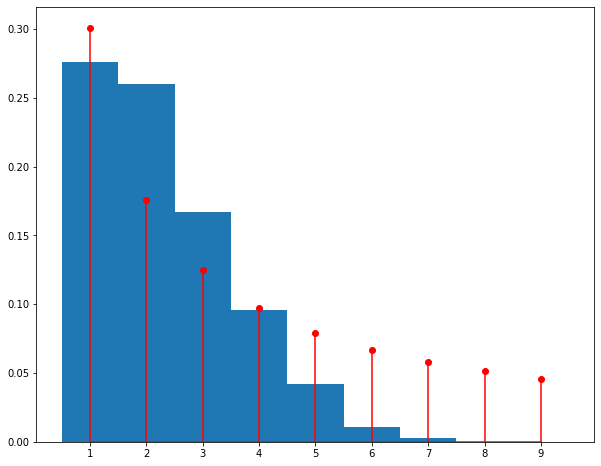

In [4]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, ndigits), ben_test[1:]/np.sum(ben_test), width=1)
plt.stem(range(1, ndigits), p_ndigits, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(range(1, ndigits))
plt.show()

In [5]:
ben_test

array([145., 276., 260., 167.,  96.,  42.,  11.,   3.,   0.,   0.])

In [6]:
sct.ks_2samp(ben_test[1:]/np.sum(ben_test), p_ndigits)

KstestResult(statistic=0.5555555555555556, pvalue=0.12587412587412586)

In [7]:
def benford_law_test(arr, ndigits=10):
    a = np.zeros(ndigits)
    for i in arr:
        a[int(str(i).replace('0.', '').replace('-', '')[0])] += 1

    return a[1:]/np.sum(a)

def ideal_benford_law(ndigits=10):
    return np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)

In [8]:
all_a = []
for i in range(1000):
    arr = np.random.normal(2, 3, 1000)
    all_a.append(benford_law_test(arr)[1])
    #assert np.allclose(a, b, atol=0.05)

In [9]:
all_a = np.asarray(all_a)

(array([  3.,  20.,  53., 167., 224., 253., 191.,  63.,  21.,   5.]),
 array([0.153 , 0.1613, 0.1696, 0.1779, 0.1862, 0.1945, 0.2028, 0.2111,
        0.2194, 0.2277, 0.236 ]),
 <BarContainer object of 10 artists>)

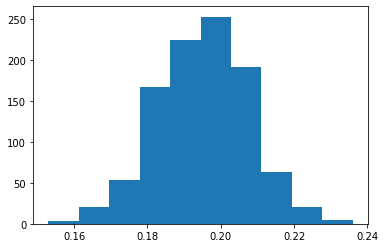

In [10]:
plt.hist(all_a, bins=10)

In [ ]:
# take log prod mod1 and show it follows uniform distribution